### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from IPython.core.display import display, HTML
import time

ModuleNotFoundError: No module named 'geopy'

### There is no geopy module we have to install it

In [5]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


### Now importing the Geopy Module 

In [7]:
from geopy.exc import GeocoderTimedOut

## Load the Dataset

In [53]:
zomatoData = pd.read_csv("/Users/rajeevb/Downloads/zomato_data.csv") 

In [55]:
zomatoData

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity
0,Yes,Yes,4.1/5,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Yes,No,4.1/5,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,Yes,No,3.8/5,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,No,No,3.7/5,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,No,No,3.8/5,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...
51712,No,No,3.6 /5,27,Bar,NaN,Continental,"1,500",Pubs and bars,Whitefield
51713,No,No,NaN,0,Bar,NaN,Finger Food,600,Pubs and bars,Whitefield
51714,No,No,NaN,0,Bar,NaN,Finger Food,"2,000",Pubs and bars,Whitefield
51715,No,Yes,4.3 /5,236,Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500",Pubs and bars,Whitefield


###  Infomation of the Dataset

In [57]:
zomatoData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   online_order               51717 non-null  object
 1   book_table                 51717 non-null  object
 2   rate                       43942 non-null  object
 3   votes                      51717 non-null  int64 
 4   rest_type                  51490 non-null  object
 5   dish_liked                 23639 non-null  object
 6   cuisines                   51672 non-null  object
 7   approx_costfor_two_people  51371 non-null  object
 8   listed_intype              51717 non-null  object
 9   listed_incity              51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


### Here we can see that some columns have missing values:
- 'rate', 'rest_type', and 'dish_liked' have fewer non-null entries, indicating missing data.
- All other columns are complete (no missing values).
- Also, most columns are of type 'object', except for 'votes', which is an integer

### First of all what is meaning of missing and no missing values

### "Non-null" means "not empty" or "not missing".

In your dataset, when it says, for example, rate 43942 non-null, it means that out of 51,717 rows, 43,942 rows have a value for rate, and the rest (about 7,775 rows) are missing or empty.
#### In short:
- Non-null = value is present.
- Null = value is missing.

# Main Objective
- Clean and preprocess the data
- Perform exploratory data analysis (EDA)
- Merge location data for mapping
- Extract actionable insights


### so what we have to do is clean the data, analyze it through EDA, map it with location information, and finally extract meaningful insights.


## Initilaze the first step 
### Step - 1: " Clean and preprocess the data"
        1.1 - Rating Column (rate)


In [59]:
zomatoData['rate'] 


0         4.1/5
1         4.1/5
2         3.8/5
3         3.7/5
4         3.8/5
          ...  
51712    3.6 /5
51713       NaN
51714       NaN
51715    4.3 /5
51716    3.4 /5
Name: rate, Length: 51717, dtype: object

In [63]:
zomatoData['rate'].fillna("-", inplace=True)


In [65]:
zomatoData['rate'].isnull().sum()

0

- 1.2 Remove /5 and retain only the numeric value

In [68]:
zomatoData['rate'] = zomatoData['rate'].str.replace(r'/5', '', regex=True)


In [70]:
zomatoData['rate'] 

0         4.1
1         4.1
2         3.8
3         3.7
4         3.8
         ... 
51712    3.6 
51713       -
51714       -
51715    4.3 
51716    3.4 
Name: rate, Length: 51717, dtype: object

- 1.3 Convert to float using pd.to_numeric()


In [74]:
zomatoData['rate']  = pd.to_numeric(zomatoData['rate'] , errors='coerce')


In [76]:
zomatoData['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

In [78]:
zomatoData['rate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 51717 entries, 0 to 51716
Series name: rate
Non-Null Count  Dtype  
--------------  -----  
41665 non-null  float64
dtypes: float64(1)
memory usage: 404.2 KB


- 1.4]. Fill missing values using the median rating

In [86]:
median_rating = zomatoData['rate'].median()
zomatoData['rate'].fillna(median_rating, inplace=True)

In [88]:
zomatoData['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    3.7
51714    3.7
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

## Step 2: Cost Column (approx_costfor_two_people)


- 2.1] Remove commas from numeric strings ('1,000' → '1000')


In [92]:
zomatoData['approx_costfor_two_people'] = zomatoData['approx_costfor_two_people'].str.replace(',', '').astype(float)


In [94]:
zomatoData['approx_costfor_two_people']

0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
51712    1500.0
51713     600.0
51714    2000.0
51715    2500.0
51716    1500.0
Name: approx_costfor_two_people, Length: 51717, dtype: float64

- 2.2].Convert to numeric

In [97]:
zomatoData['approx_costfor_two_people'] = pd.to_numeric(zomatoData['approx_costfor_two_people'], errors='coerce')


In [99]:
zomatoData['approx_costfor_two_people']

0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
51712    1500.0
51713     600.0
51714    2000.0
51715    2500.0
51716    1500.0
Name: approx_costfor_two_people, Length: 51717, dtype: float64

In [101]:
zomatoData['approx_costfor_two_people'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 51717 entries, 0 to 51716
Series name: approx_costfor_two_people
Non-Null Count  Dtype  
--------------  -----  
51371 non-null  float64
dtypes: float64(1)
memory usage: 404.2 KB


- Here dtype object is converted to float

- 2.3].Fill missing values using the median cost


In [106]:
median_cost = zomatoData['approx_costfor_two_people'].median()
zomatoData['approx_costfor_two_people'].fillna(median_cost, inplace=True)

In [108]:
zomatoData['approx_costfor_two_people'].isnull().sum()

0

In [112]:
zomatoData['approx_costfor_two_people'].median()

400.0

In [120]:
zomatoData['approx_costfor_two_people'].head(100)

0     800.0
1     800.0
2     800.0
3     300.0
4     600.0
      ...  
95    800.0
96    250.0
97    950.0
98    300.0
99    400.0
Name: approx_costfor_two_people, Length: 100, dtype: float64

## Step 3: Categorical Columns

- 3.1].dish_liked → Replace NaN with "Not Available"


In [128]:
zomatoData["dish_liked"].isnull().sum()

28078

In [130]:
zomatoData["dish_liked"].fillna('Not Available', inplace=True)

In [132]:
zomatoData["dish_liked"].isnull().sum()

0

- 3.2].cuisines → Replace NaN with "Other"

In [153]:
print("Before cuisines change Nan to other, Nan values count is :")

zomatoData["cuisines"].isnull().sum()

Before cuisines change Nan to other, Nan values count is :


0

In [139]:
zomatoData["cuisines"].fillna('Other', inplace=True)

In [151]:
# after replace nan to other 
print("After cuisines change Nan to other, Nan values count is :")
zomatoData["cuisines"].isnull().sum()

After cuisines change Nan to other, Nan values count is :


0

- 3.3].rest_type → Replace NaN with "Unknown"


In [156]:
zomatoData['rest_type'].isnull().sum()


227

In [158]:
zomatoData['rest_type'].fillna('Unknown', inplace=True)

/var/folders/sq/yd4cryl525v1v539blv0k9q40000gn/T/ipykernel_42515/597019963.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  zomatoData['rest_type'].fillna('Unknown', inplace=True)


In [160]:
zomatoData['rest_type'].isnull().sum()

0

## Step 4: Votes Column

- Fill missing values in votes with median


In [166]:
zomatoData["votes"].isnull().sum()

0

- Here votes column no missing values 

## Step 5: Binary Encoding

- Convert the following binary fields:


In [176]:
zomatoData["online_order"]


0        Yes
1        Yes
2        Yes
3         No
4         No
        ... 
51712     No
51713     No
51714     No
51715     No
51716     No
Name: online_order, Length: 51717, dtype: object

In [184]:

zomatoData["online_order"] = zomatoData["online_order"].replace({'Yes': 1, 'No': 0})
 


/var/folders/sq/yd4cryl525v1v539blv0k9q40000gn/T/ipykernel_42515/2535172745.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  zomatoData["online_order"] = zomatoData["online_order"].replace({'Yes': 1, 'No': 0})


In [186]:
zomatoData["online_order"]

0        1
1        1
2        1
3        0
4        0
        ..
51712    0
51713    0
51714    0
51715    0
51716    0
Name: online_order, Length: 51717, dtype: int64

In [188]:
zomatoData["book_table"] = zomatoData["book_table"].replace({'Yes': 1, 'No': 0})


/var/folders/sq/yd4cryl525v1v539blv0k9q40000gn/T/ipykernel_42515/1235351457.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  zomatoData["book_table"] = zomatoData["book_table"].replace({'Yes': 1, 'No': 0})


In [190]:
zomatoData["book_table"]

0        1
1        0
2        0
3        0
4        0
        ..
51712    0
51713    0
51714    0
51715    1
51716    0
Name: book_table, Length: 51717, dtype: int64

In [192]:
zomatoData

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity
0,1,1,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,1,0,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,1,0,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,0,0,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari
4,0,0,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...
51712,0,0,3.6,27,Bar,Not Available,Continental,1500.0,Pubs and bars,Whitefield
51713,0,0,3.7,0,Bar,Not Available,Finger Food,600.0,Pubs and bars,Whitefield
51714,0,0,3.7,0,Bar,Not Available,Finger Food,2000.0,Pubs and bars,Whitefield
51715,0,1,4.3,236,Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,Pubs and bars,Whitefield


## Step 6: Data Type Conversion


- 6.1].rate → float

In [196]:
zomatoData['rate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 51717 entries, 0 to 51716
Series name: rate
Non-Null Count  Dtype  
--------------  -----  
51717 non-null  float64
dtypes: float64(1)
memory usage: 404.2 KB


In [202]:
zomatoData['rate'] = zomatoData['rate'].astype(float)

In [204]:
zomatoData['rate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 51717 entries, 0 to 51716
Series name: rate
Non-Null Count  Dtype  
--------------  -----  
51717 non-null  float64
dtypes: float64(1)
memory usage: 404.2 KB


- 6.2].votes → integer

In [207]:
zomatoData['votes'] = zomatoData['votes'].astype(int)

- 6.3].approx_costfor_two_people → integer

In [214]:
zomatoData['approx_costfor_two_people'].dtype

dtype('float64')

In [218]:
zomatoData['approx_costfor_two_people']= zomatoData['approx_costfor_two_people'].astype(int)

In [226]:
print("After changeing datatype ")
zomatoData['approx_costfor_two_people'].dtype

After changeing datatype 


dtype('int64')

## 1. What is the shape of the given dataset?


In [231]:
zomatoData.shape

(51717, 10)

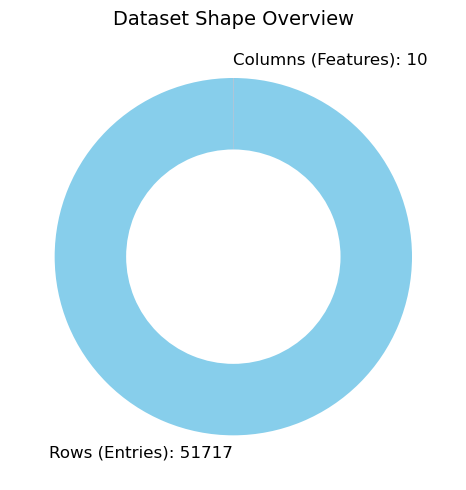

In [253]:
rows, cols = zomatoData.shape
 
labels = [f'Rows (Entries): {rows}', f'Columns (Features): {cols}']
sizes = [rows, cols]
 
plt.figure(figsize=(5, 5))
plt.pie(
    sizes,
    labels=labels,
    startangle=90,
    colors=['skyblue', 'lightcoral'],
    wedgeprops=dict(width=0.4),
    textprops={'fontsize': 12}
)
plt.title("Dataset Shape Overview", fontsize=14)
plt.tight_layout()
plt.show()

## 2. How many restaurants serve North Indian cuisine?


In [237]:
north_count = zomatoData[zomatoData['cuisines'].str.contains('North Indian', na=False)].shape[0]
print("Restaurants serving North Indian cuisine:", north_count)

Restaurants serving North Indian cuisine: 21085


/var/folders/sq/yd4cryl525v1v539blv0k9q40000gn/T/ipykernel_42515/2075374740.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='viridis')


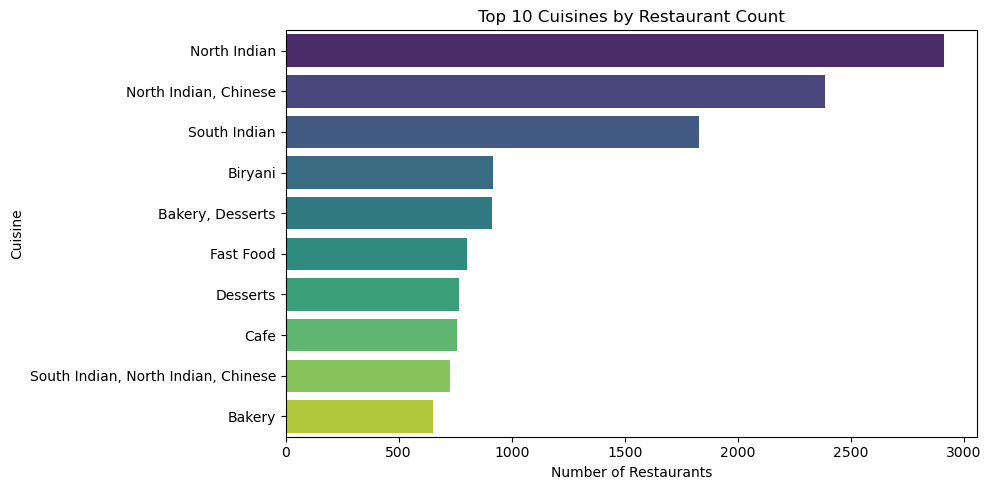

In [259]:
top_cuisines = zomatoData['cuisines'].value_counts().nlargest(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='viridis')
plt.title('Top 10 Cuisines by Restaurant Count')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.tight_layout()
plt.show()

## 3. What cuisine is most commonly offered by restaurants in Bangalore?


In [263]:
from collections import Counter

all_cuisines = zomatoData['cuisines'].str.split(', ')
cuisine_flat = [c for sublist in all_cuisines for c in sublist]
cuisine_common = Counter(cuisine_flat).most_common(1)
print("3. Most common cuisine:", cuisine_common[0][0])

3. Most common cuisine: North Indian


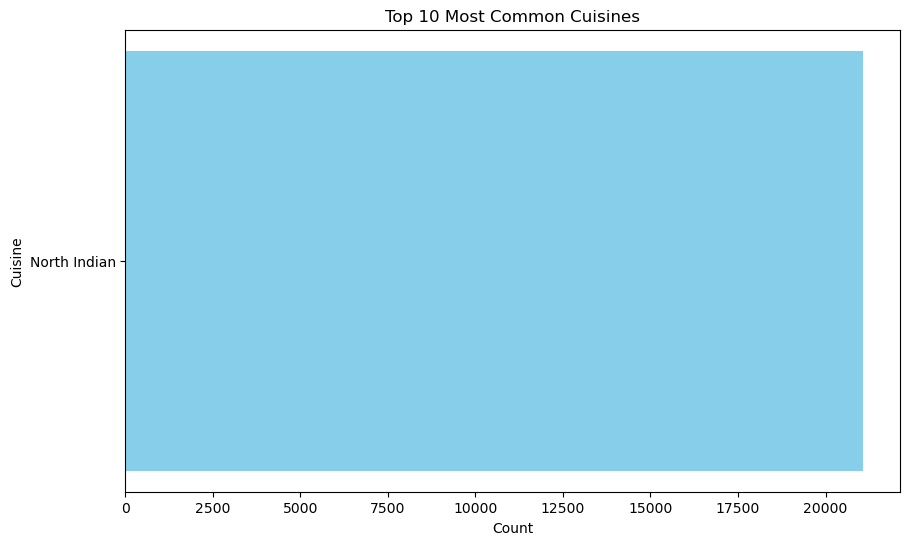

In [340]:
cuisines, counts = zip(*cuisine_common)

# Create bar chart
plt.figure(figsize=(10, 6))
plt.barh(cuisines, counts, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Cuisine')
plt.title('Top 10 Most Common Cuisines')
plt.gca().invert_yaxis()  # Invert y-axis to have the most common on top
plt.show()

## 4. Which locality in Bangalore has the highest average cost for dining (for two people)?

In [270]:
avg_cost_by_loc = zomatoData.groupby('listed_incity')['approx_costfor_two_people'].mean()
print("4. Locality with highest avg. cost:", avg_cost_by_loc.idxmax())

4. Locality with highest avg. cost: Church Street


## 

In [273]:
high_votes = zomatoData[zomatoData['votes'] > 1000]
top_rest_type = high_votes.groupby('rest_type')['rate'].mean().idxmax()
print("5. Top-rated rest_type (>1000 votes):", top_rest_type)

5. Top-rated rest_type (>1000 votes): Bakery


## 6. How much does it cost at minimum to eat out in Bangalore?


In [276]:
min_cost = zomatoData['approx_costfor_two_people'].min()
print("6. Minimum cost to eat out:", min_cost)

6. Minimum cost to eat out: 40


## 7. What percentage of total online orders is received by restaurants in Banashankari?


## 8. Which locality has the most restaurants with over 500 votes and a rating below 3.0?

In [292]:
cond = zomatoData[(zomatoData['votes'] > 500) & (zomatoData['rate'] < 3.0)]
most_common_loc = cond['listed_incity'].value_counts().idxmax()
most_common_loc

'Brookefield'

## 9. Which locality in Bangalore should Zomato target for expansion based on restaurant type diversity?


In [297]:
diversity = zomatoData.groupby('listed_incity')['rest_type'].nunique()
most_diverse = diversity.idxmax()
print("9. Locality with most diverse rest_type:", most_diverse)

9. Locality with most diverse rest_type: BTM


## 10. What's the average cost difference between buffet and delivery restaurants?


In [300]:
buffet = zomatoData[zomatoData['listed_intype'] == 'Buffet']['approx_costfor_two_people'].mean()
delivery = zomatoData[zomatoData['listed_intype'] == 'Delivery']['approx_costfor_two_people'].mean()
cost_diff = abs(buffet - delivery)
print("10. Avg cost difference (Buffet vs Delivery):", cost_diff)


10. Avg cost difference (Buffet vs Delivery): 831.2513659898209


## 11 . What is the maximum number of votes received by any restaurant with online ordering?


In [303]:
max_votes_online = zomatoData[zomatoData['online_order'] == 'Yes']['votes'].max()
print("11. Max votes (online orders):", max_votes_online)


11. Max votes (online orders): nan


In [311]:
max_votes = zomatoData['votes'].max()
max_votes

16832

## 12. What is the average rating of restaurants that serve both North Indian and Chinese cuisines?


In [314]:
both_cuisine = zomatoData[zomatoData['cuisines'].str.contains('North Indian') & zomatoData['cuisines'].str.contains('Chinese')]
avg_rating_both = both_cuisine['rate'].mean()
print("12. Avg rating (North Indian & Chinese):", round(avg_rating_both, 2))

12. Avg rating (North Indian & Chinese): 3.59


## 13. What is the most profitable area for Zomato based on potential revenue estimation?


In [317]:
revenue = zomatoData.dropna(subset=['approx_costfor_two_people', 'votes'])
revenue['est_revenue'] = revenue['approx_costfor_two_people'] * revenue['votes']
most_revenue_loc = revenue.groupby('listed_incity')['est_revenue'].sum().idxmax()
print("13. Most profitable locality:", most_revenue_loc)


13. Most profitable locality: Koramangala 7th Block


## 14. If Zomato wants to reduce customer complaints, which restaurant type should they focus on?


In [321]:
avg_rating_by_type = zomatoData.groupby('rest_type')['rate'].mean()
lowest_type = avg_rating_by_type.idxmin()
print("14. Focus on reducing complaints in:", lowest_type)


14. Focus on reducing complaints in: Dessert Parlor, Kiosk


## 15. In which area should Zomato invest by considering high rating (rate > 4.2), high number of votes (> 500) and including online orders?


In [330]:
zomatoData = pd.read_csv("/Users/rajeevb/Downloads/zomato_data.csv") 

In [332]:
best_area_cond = zomatoData[(zomatoData['rate'] > 4.2) & (zomatoData['votes'] > 500) & (zomatoData['online_order'] == 'Yes')]
best_area = best_area_cond['listed_incity'].value_counts().idxmax()
print("Best area to invest in:", best_area)


TypeError: '>' not supported between instances of 'str' and 'float'

14. Focus on reducing complaints in: Dessert Parlor, Kiosk


## For merged 

In [349]:
 


data_2 = pd.read_csv("/Users/rajeevb/Downloads/Geographical Coordinates.csv") 
data_2

,listed_incity,Latitude,Longitude
0,Banashankari,12.939333,77.553982
1,Bannerghatta Road,12.952660,77.605048
2,Basavanagudi,12.941726,77.575502
3,Bellandur,12.925352,77.675941
4,Brigade Road,12.967358,77.606435
5,Brookefield,12.963814,77.722437
6,BTM,12.916360,77.604733
7,Church Street,12.974914,77.605247
8,Electronic City,12.848760,77.648253
9,Frazer Town,12.998683,77.615525


In [351]:
merged_file = pd.merge(zomatoData,data_2, on="listed_incity", how="left")
merged_file

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity,Latitude,Longitude
0,Yes,Yes,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari,12.939333,77.553982
1,Yes,No,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari,12.939333,77.553982
2,Yes,No,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari,12.939333,77.553982
3,No,No,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari,12.939333,77.553982
4,No,No,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari,12.939333,77.553982
...,...,...,...,...,...,...,...,...,...,...,...,...
51712,No,No,3.6,27,Bar,NaN,Continental,"1,500",Pubs and bars,Whitefield,NaN,NaN
51713,No,No,NaN,0,Bar,NaN,Finger Food,600,Pubs and bars,Whitefield,NaN,NaN
51714,No,No,NaN,0,Bar,NaN,Finger Food,"2,000",Pubs and bars,Whitefield,NaN,NaN
51715,No,Yes,4.3,236,Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500",Pubs and bars,Whitefield,NaN,NaN
